In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from collections import OrderedDict 
import math
import numpy as np
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('3 EG_EGY_PRIM.csv',index_col='S.No.')
data

,GeoAreaName,2001,2017
S.No.,,,
1,Afghanistan,1.86,1.93
2,Albania,4.20,2.91
3,Algeria,3.45,4.05
4,Americas,6.37,4.79
5,Angola,4.44,3.41
...,...,...,...
201,Vanuatu,4.22,3.65
202,Venezuela (Bolivarian Republic of),6.08,6.02
203,Yemen,3.05,2.04


In [5]:
#for calculating mean
def cal_mean(data,column):
  column=str(column)
  count=len(data[column])
  sum=0
  for index,row in data.iterrows():
      sum=sum+row[column]
  u=round(sum/count,2)
  return u

In [6]:
#for calculating standard deviation
def cal_dev(data,column):
  sum=0
  column=str(column)
  count=len(data[column])
  for index,row in data.iterrows():
      diff=round((row[column]-cal_mean(data,column))**2,2)
      sum=sum+diff
  sd=round(math.sqrt(sum/count),2)
  return sd

# **For 2001**
UN Claim is 6.49

In [7]:
mean_1=cal_mean(data,2001)
dev_1=cal_dev(data,2001)
print('Mean: ',mean_1)
print('Standard Deviation: ',dev_1)

Mean:  6.86
Standard Deviation:  4.88


# **For 2017**
UN Claim is 5.01

In [8]:
mean_2=cal_mean(data,2017)
dev_2=cal_dev(data,2017)
print('Mean: ',mean_2)
print('Standard Deviation: ',dev_2)

Mean:  5.14
Standard Deviation:  3.02


**Test of Hypothesis concerning differences  of means (Two Poulation )**

In [9]:
#Null Hypothesis H0:
print("Null Hypothesis H0:\nμ1-μ2=𝛿")
print("Alternate Hypothesis H1:\nμ1-μ2≠𝛿")

Null Hypothesis H0:
μ1-μ2=𝛿
Alternate Hypothesis H1:
μ1-μ2≠𝛿


In [10]:
x1=mean_1
x2=mean_2
μ1=6.49
μ2=5.01
𝛿=round(μ1-μ2,2)
print("x1:",x1)
print("x2:",x2)
print("μ1:",μ1)
print("μ2:",μ2)
print("𝛿:",𝛿)

x1: 6.86
x2: 5.14
μ1: 6.49
μ2: 5.01
𝛿: 1.48


In [11]:
def z_test(x1,x2,𝛿,dev1,dev2,n1,n2):
  a=x1-x2-𝛿
  b=((dev1)**2)/n1
  c=((dev2)**2)/n2
  d=math.sqrt(b+c)
  z=a/d
  if -1.69<z<1.69:
    print("Hypothesis Accepted")
  else:
    print("Hypothesis Rejected")
  return z

In [12]:
z_test(x1,x2,𝛿,dev_1,dev_2,len(data['2001']),len(data['2017']))

Hypothesis Accepted


0.5987708604736225

# **Graphs For Year 2001**

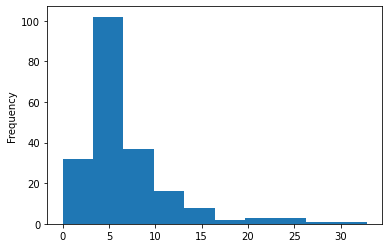

In [13]:
data['2001'].plot.hist(bins=10)

In [14]:
el=data.loc[(data['2001']<4)].drop(columns=['2017'])
el3=data.loc[(data['2001']>=4)&(data['2001']<6)].drop(columns=['2017'])
el4=data.loc[(data['2001']>=6)&(data['2001']<8)].drop(columns=['2017'])
el5=data.loc[(data['2001']>=8)&(data['2001']<15)].drop(columns=['2017'])
el6=data.loc[(data['2001']>=15)].drop(columns=['2017'])

Text(0, 0.5, 'Countries')

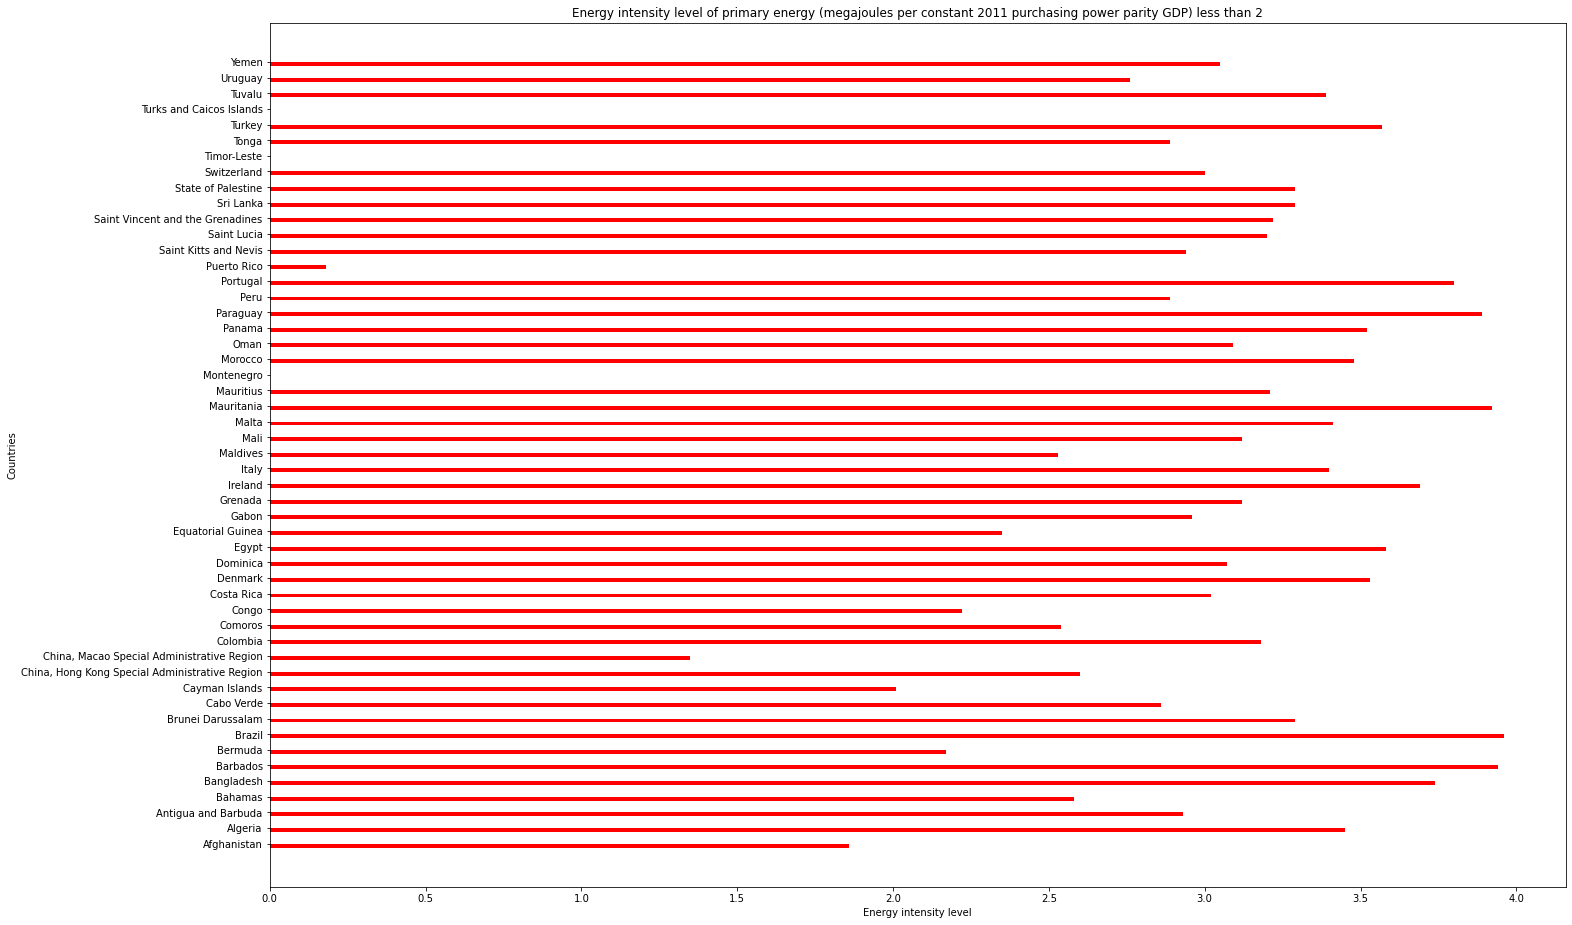

In [15]:
x = el['GeoAreaName']
y = el['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) less than 2')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

Text(0, 0.5, 'Countries')

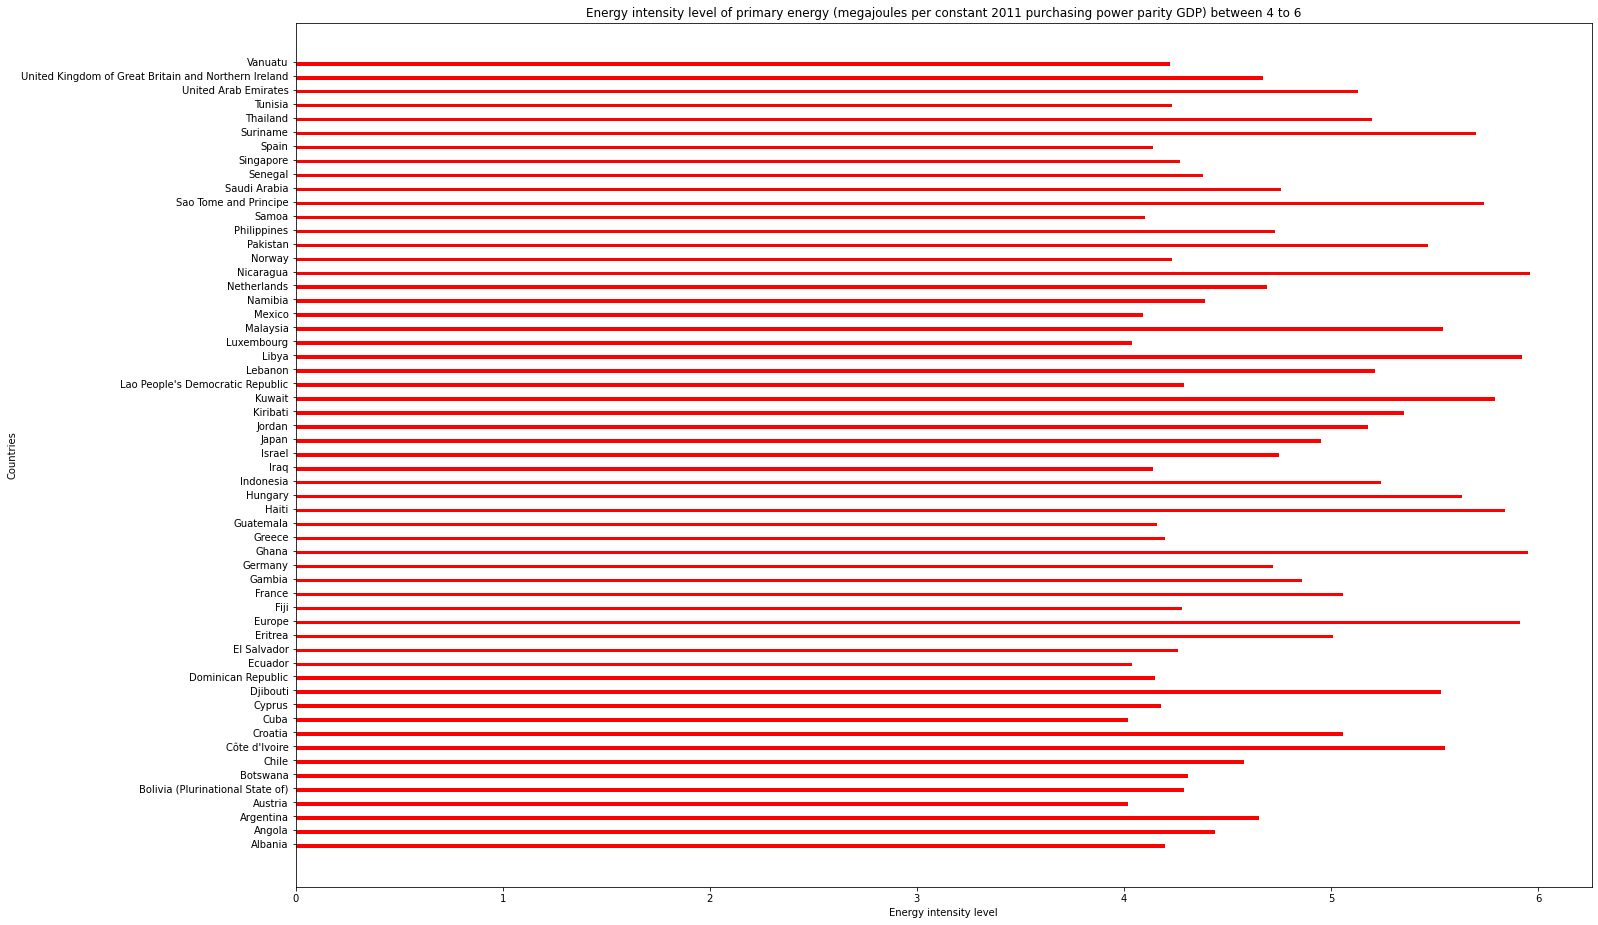

In [16]:
x = el3['GeoAreaName']
y = el3['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) between 4 to 6')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

Text(0, 0.5, 'Countries')

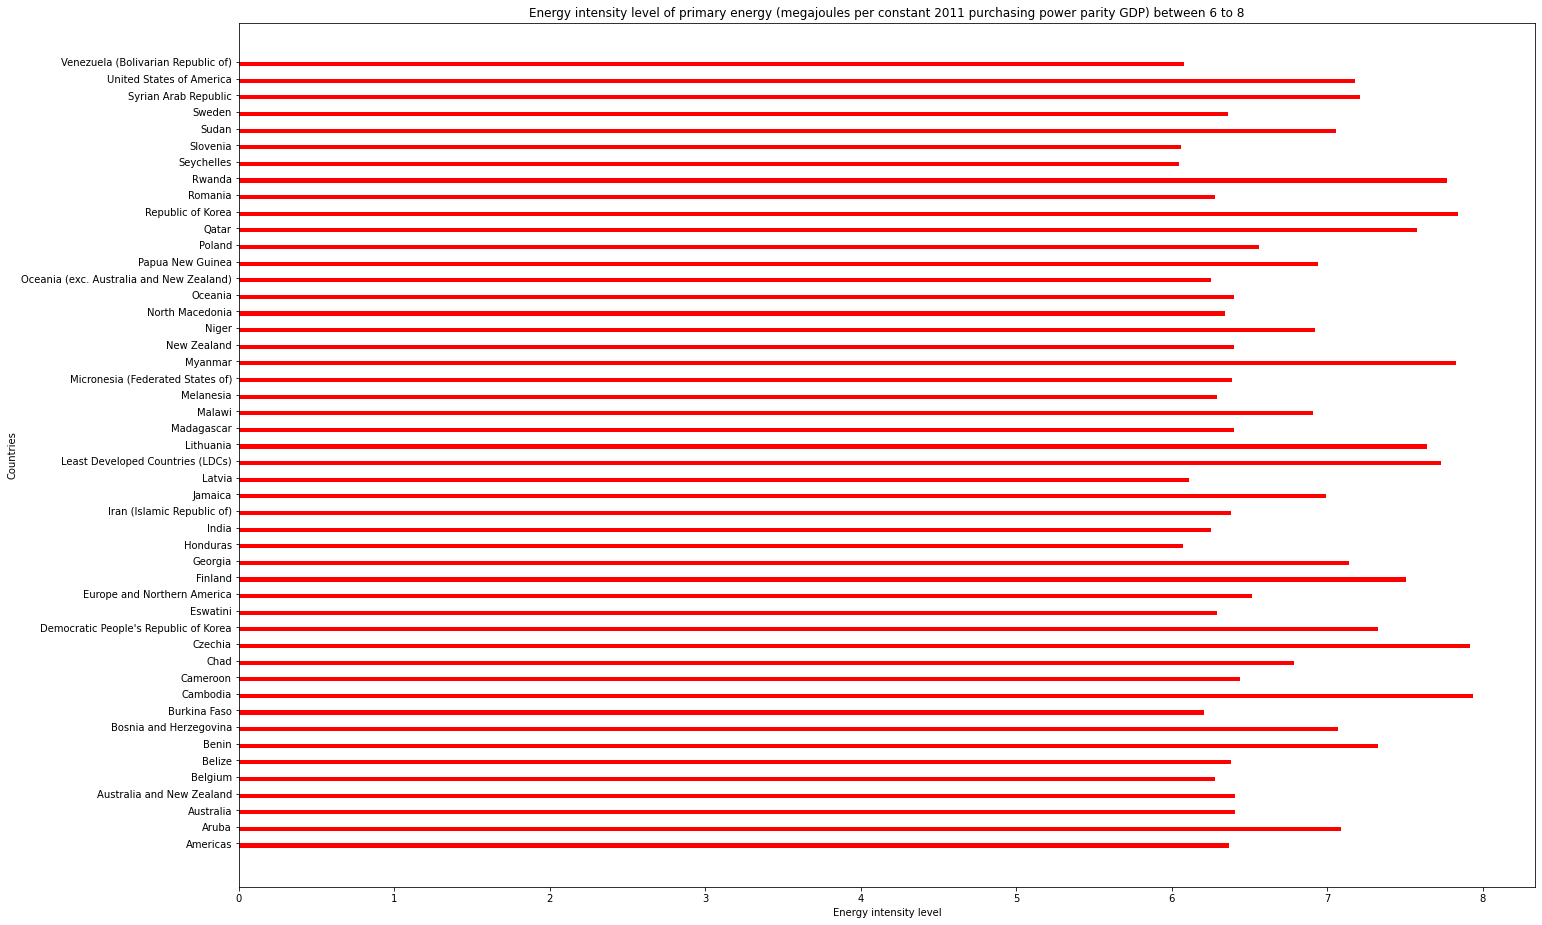

In [17]:
x = el4['GeoAreaName']
y = el4['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) between 6 to 8')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()AC

Text(0, 0.5, 'Countries')

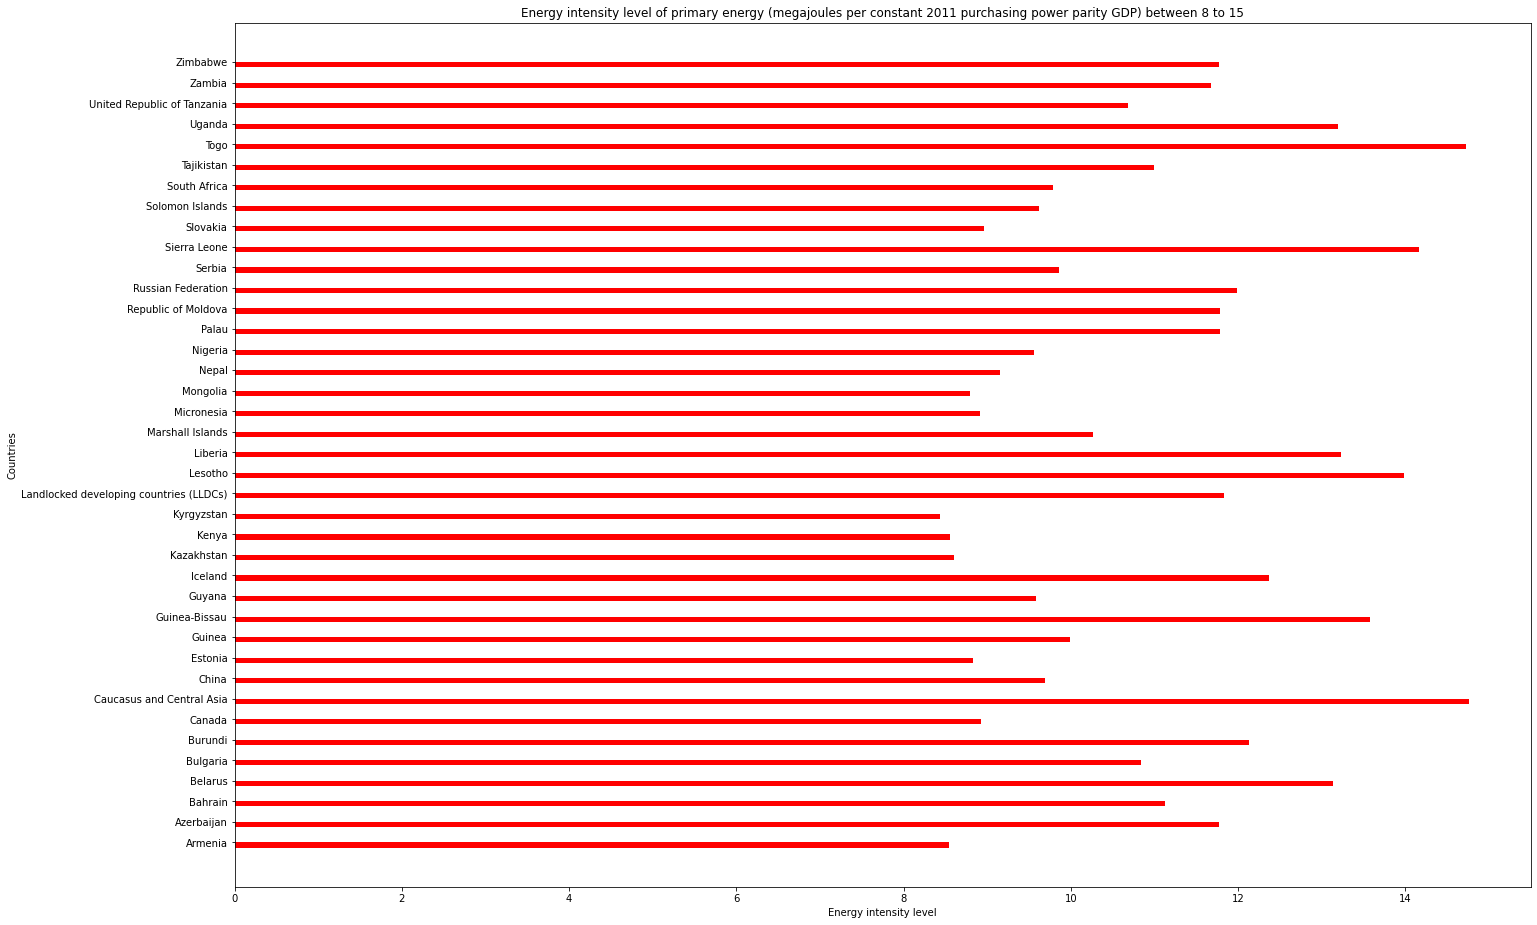

In [18]:
x = el5['GeoAreaName']
y = el5['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) between 8 to 15')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

Text(0, 0.5, 'Countries')

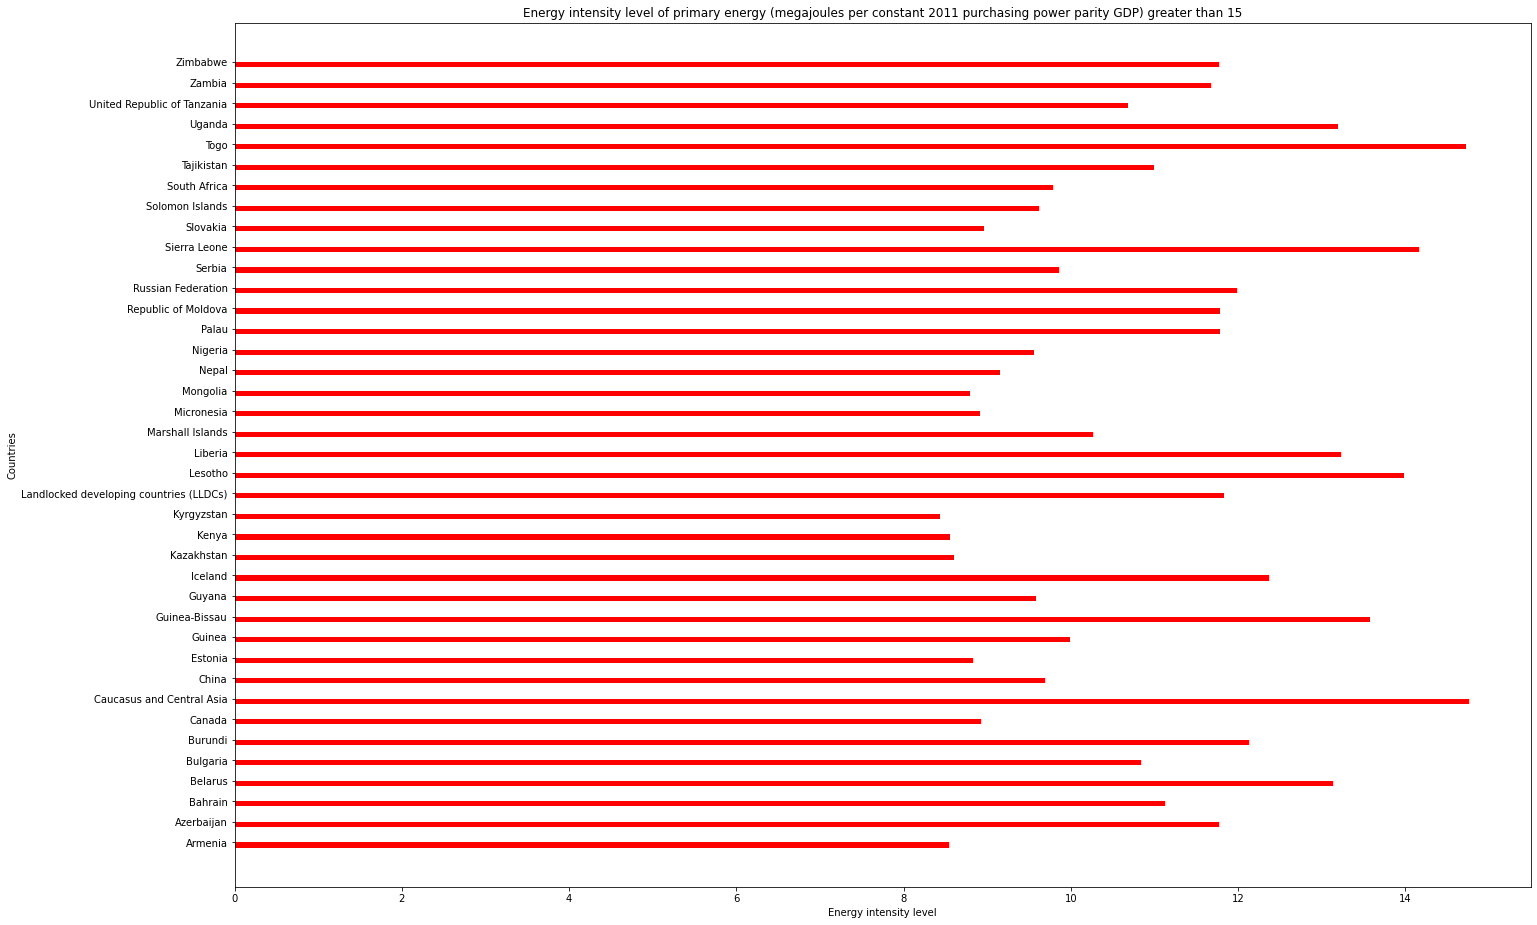

In [19]:
x = el5['GeoAreaName']
y = el5['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) greater than 15')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

In [20]:
l=[]
trace0= go.Scatter(
        y= data['2001'],
        mode= 'markers',
        name='Energy intensity',
        marker= dict(size= data['2001'].values,
                    line= dict(width=1),
                    color= data['2001'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= data['GeoAreaName'].values) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Scatter plot of Energy intensity level of primary energy in 2001',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Energy intensity',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False,
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

# **Graphs For Year 2017**

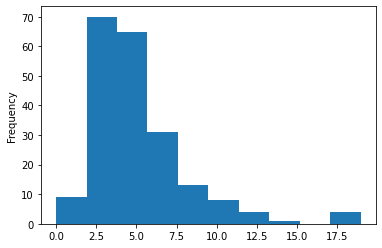

In [21]:
data['2017'].plot.hist(bins=10)

In [22]:
em=data.loc[(data['2017']<2)].drop(columns=['2001'])
em2=data.loc[(data['2017']>=2)&(data['2017']<4)].drop(columns=['2001'])
em3=data.loc[(data['2017']>=4)&(data['2017']<6)].drop(columns=['2001'])
em4=data.loc[(data['2017']>=6)&(data['2017']<8)].drop(columns=['2001'])
em5=data.loc[(data['2017']>=8)&(data['2017']<15)].drop(columns=['2001'])
em6=data.loc[(data['2017']>=15)].drop(columns=['2001'])

Text(0, 0.5, 'Countries')

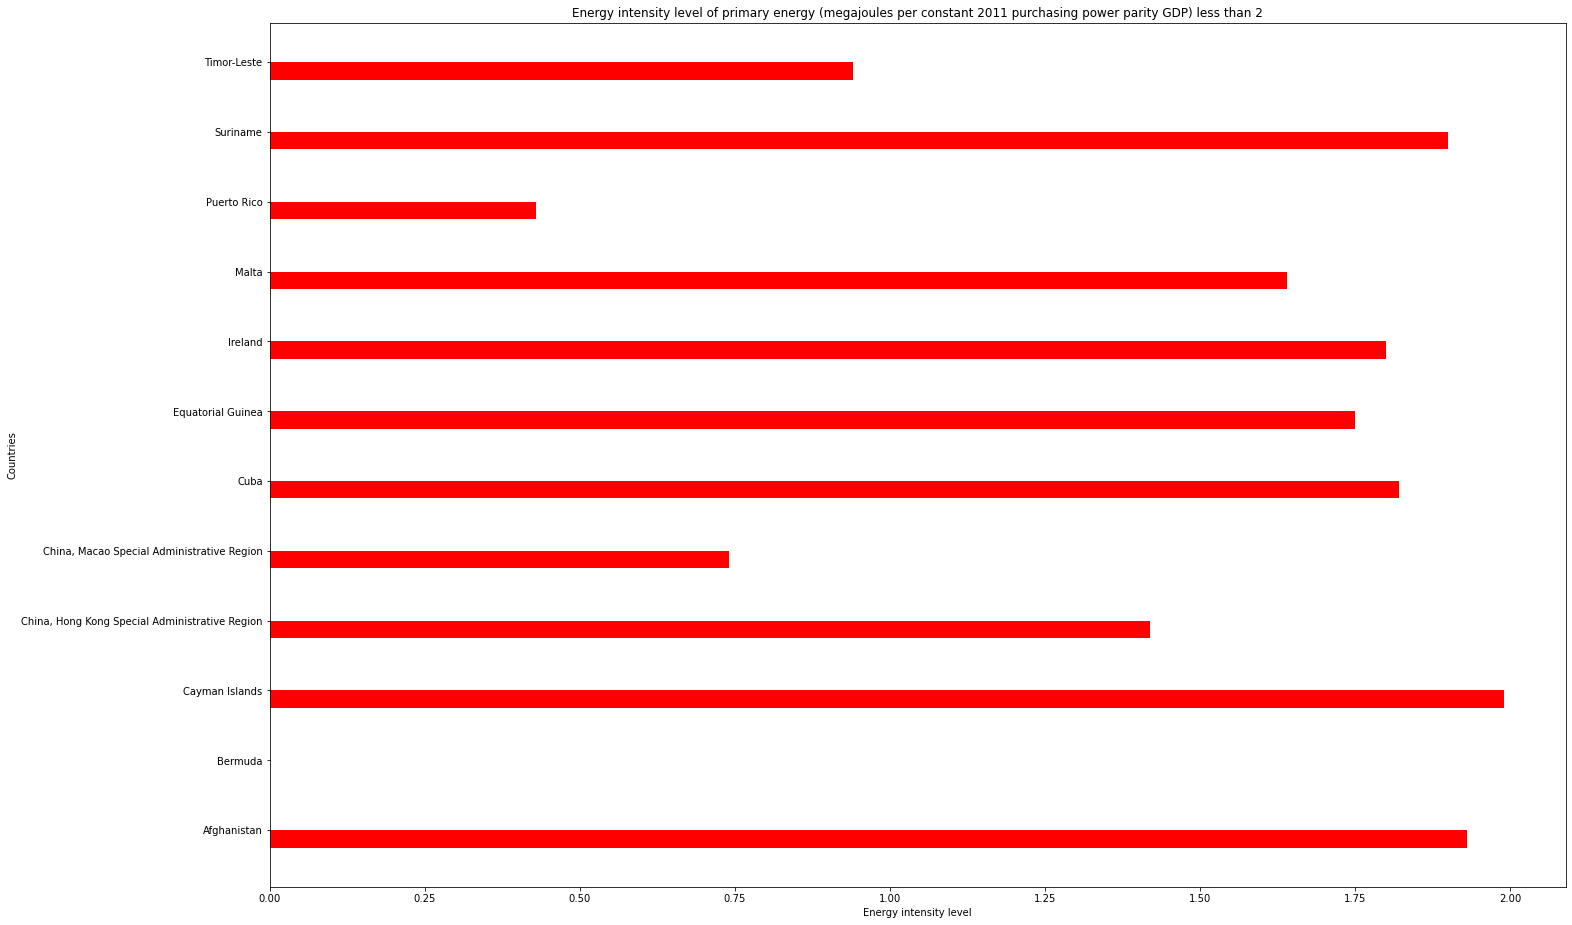

In [23]:
x = em['GeoAreaName']
y = em['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) less than 2')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

Text(0, 0.5, 'Countries')

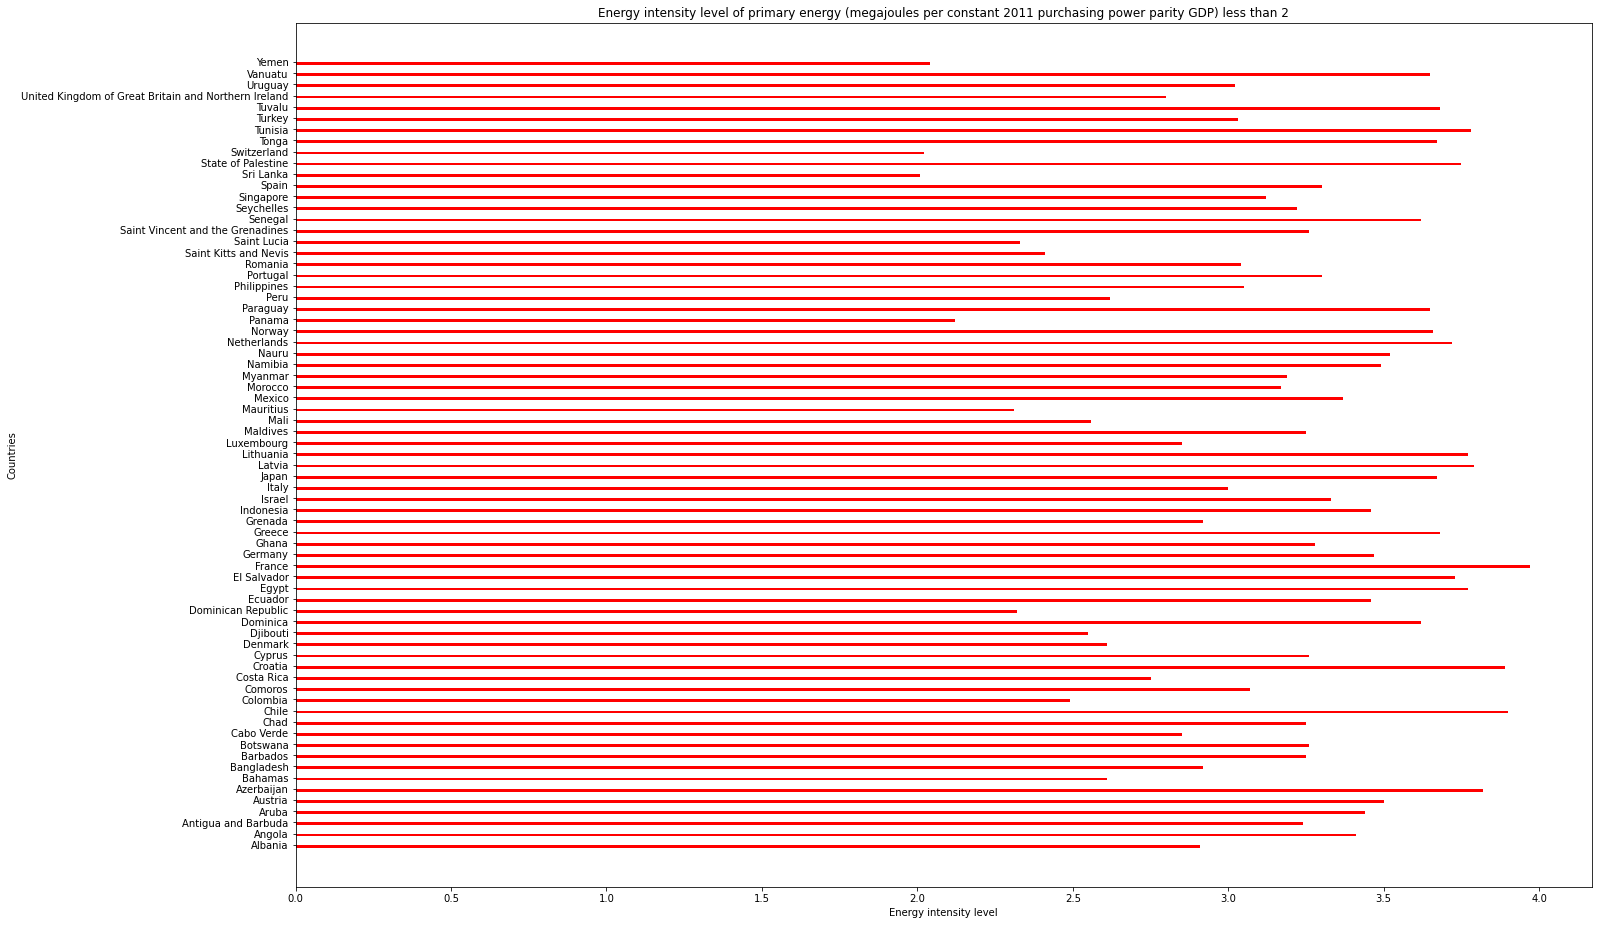

In [24]:
x = em2['GeoAreaName']
y = em2['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) less than 2')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

Text(0, 0.5, 'Countries')

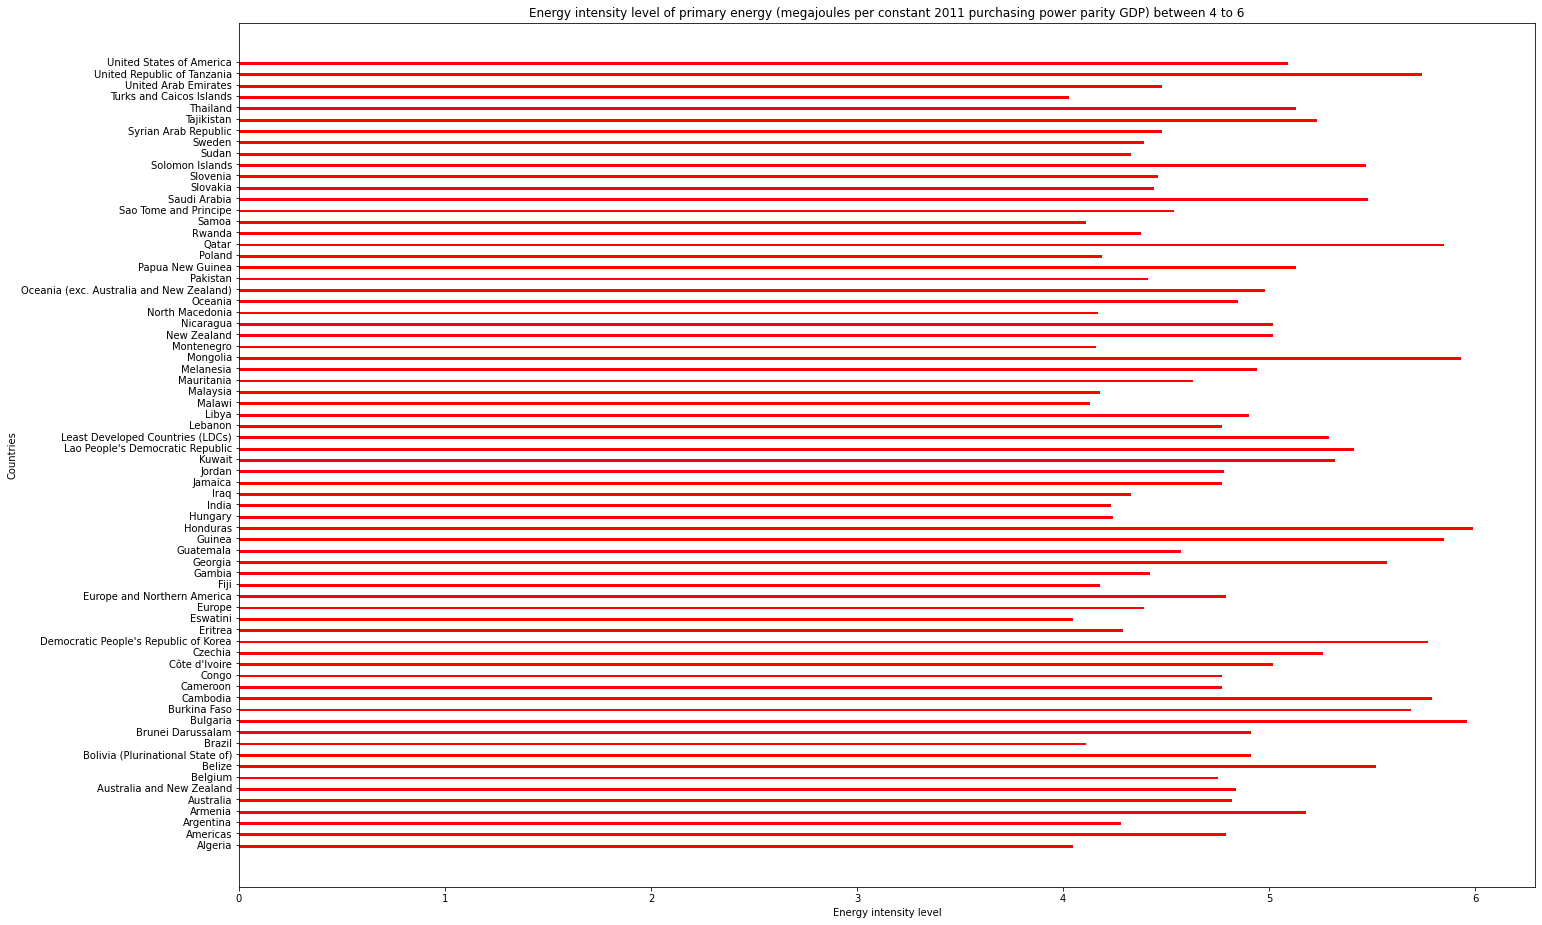

In [25]:
x = em3['GeoAreaName']
y = em3['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) between 4 to 6')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

Text(0, 0.5, 'Countries')

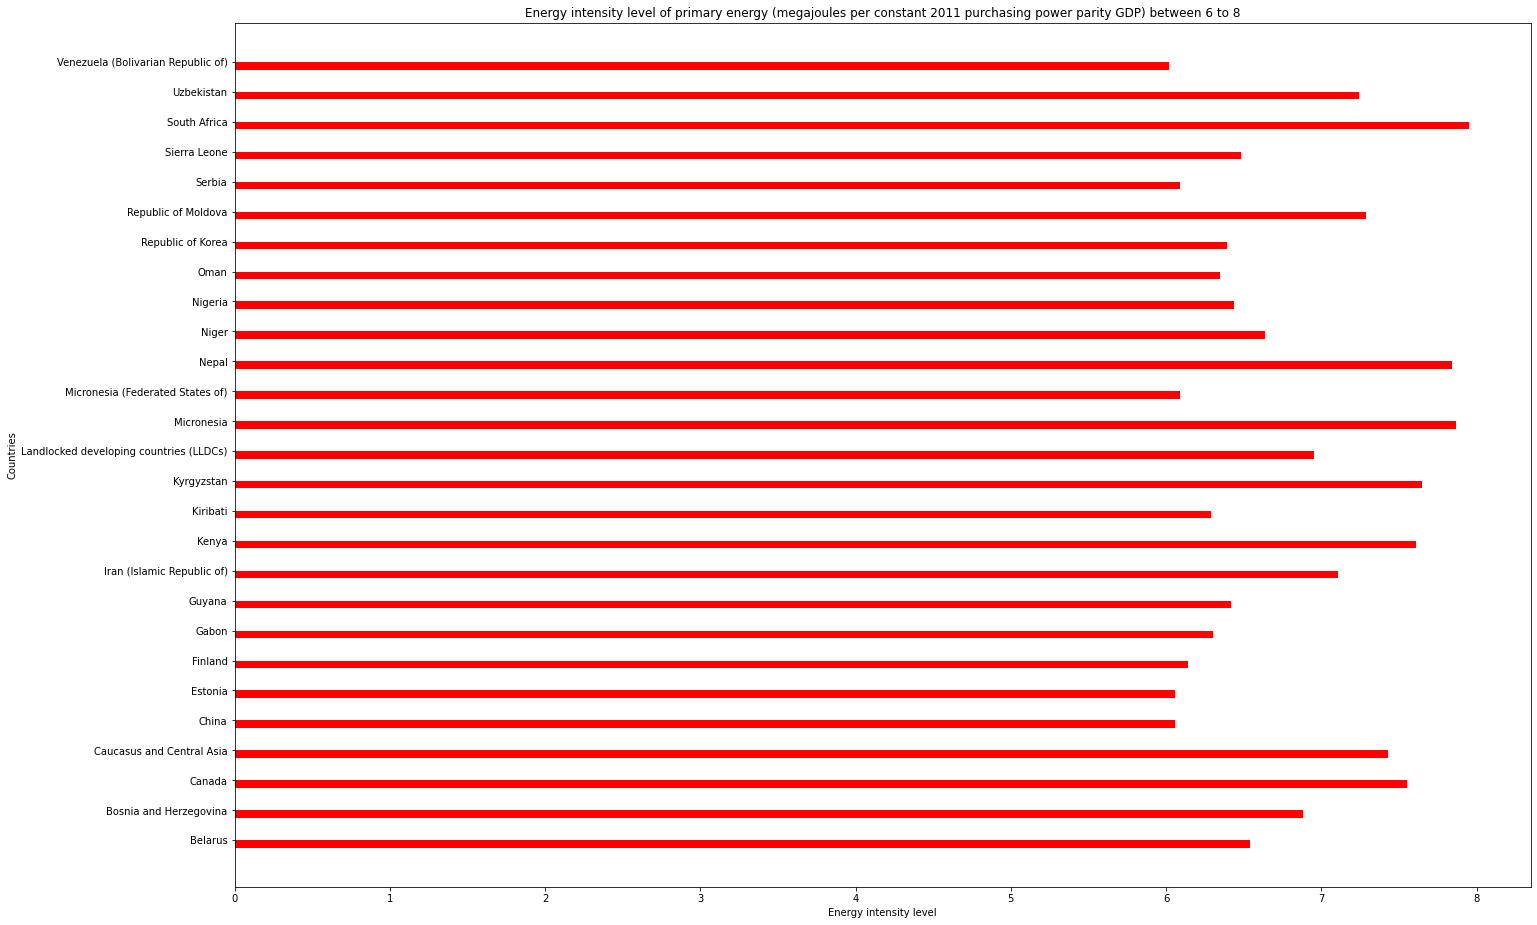

In [26]:
x = em4['GeoAreaName']
y = em4['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) between 6 to 8')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()AC

Text(0, 0.5, 'Countries')

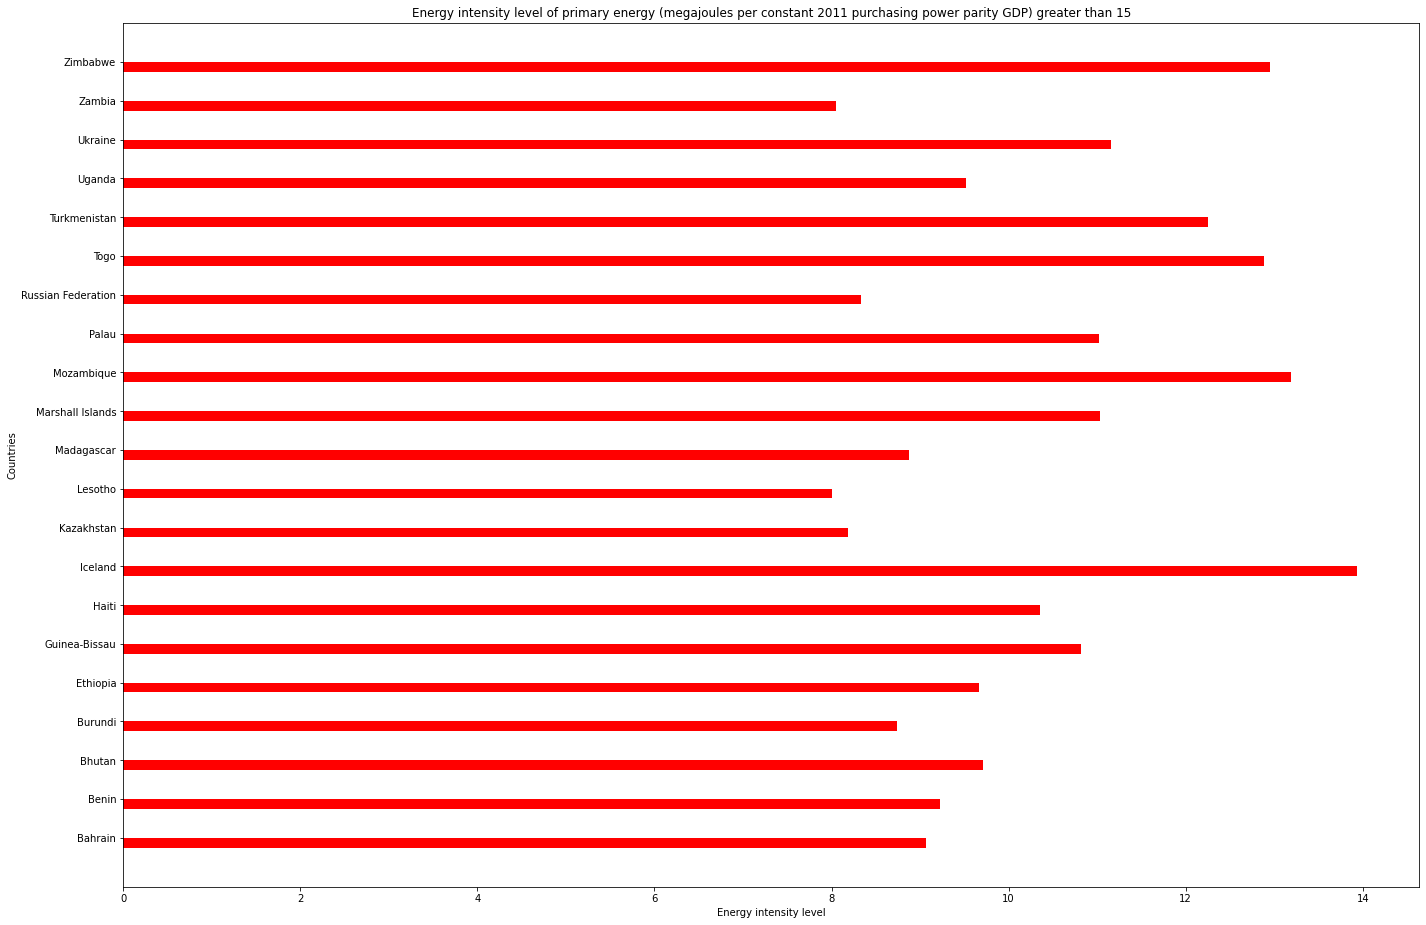

In [27]:
x = em5['GeoAreaName']
y = em5['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Energy intensity level of primary energy (megajoules per constant 2011 purchasing power parity GDP) greater than 15')
plt.xlabel('Energy intensity level')
plt.ylabel('Countries')    
#plt.show()

In [28]:
l=[]
trace0= go.Scatter(
        y= data['2017'],
        mode= 'markers',
        name='Energy intensity',
        marker= dict(size= data['2017'].values,
                    line= dict(width=1),
                    color= data['2017'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= data['GeoAreaName'].values) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Scatter plot of Energy intensity level of primary energy in 2017',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Energy intensity',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False,
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

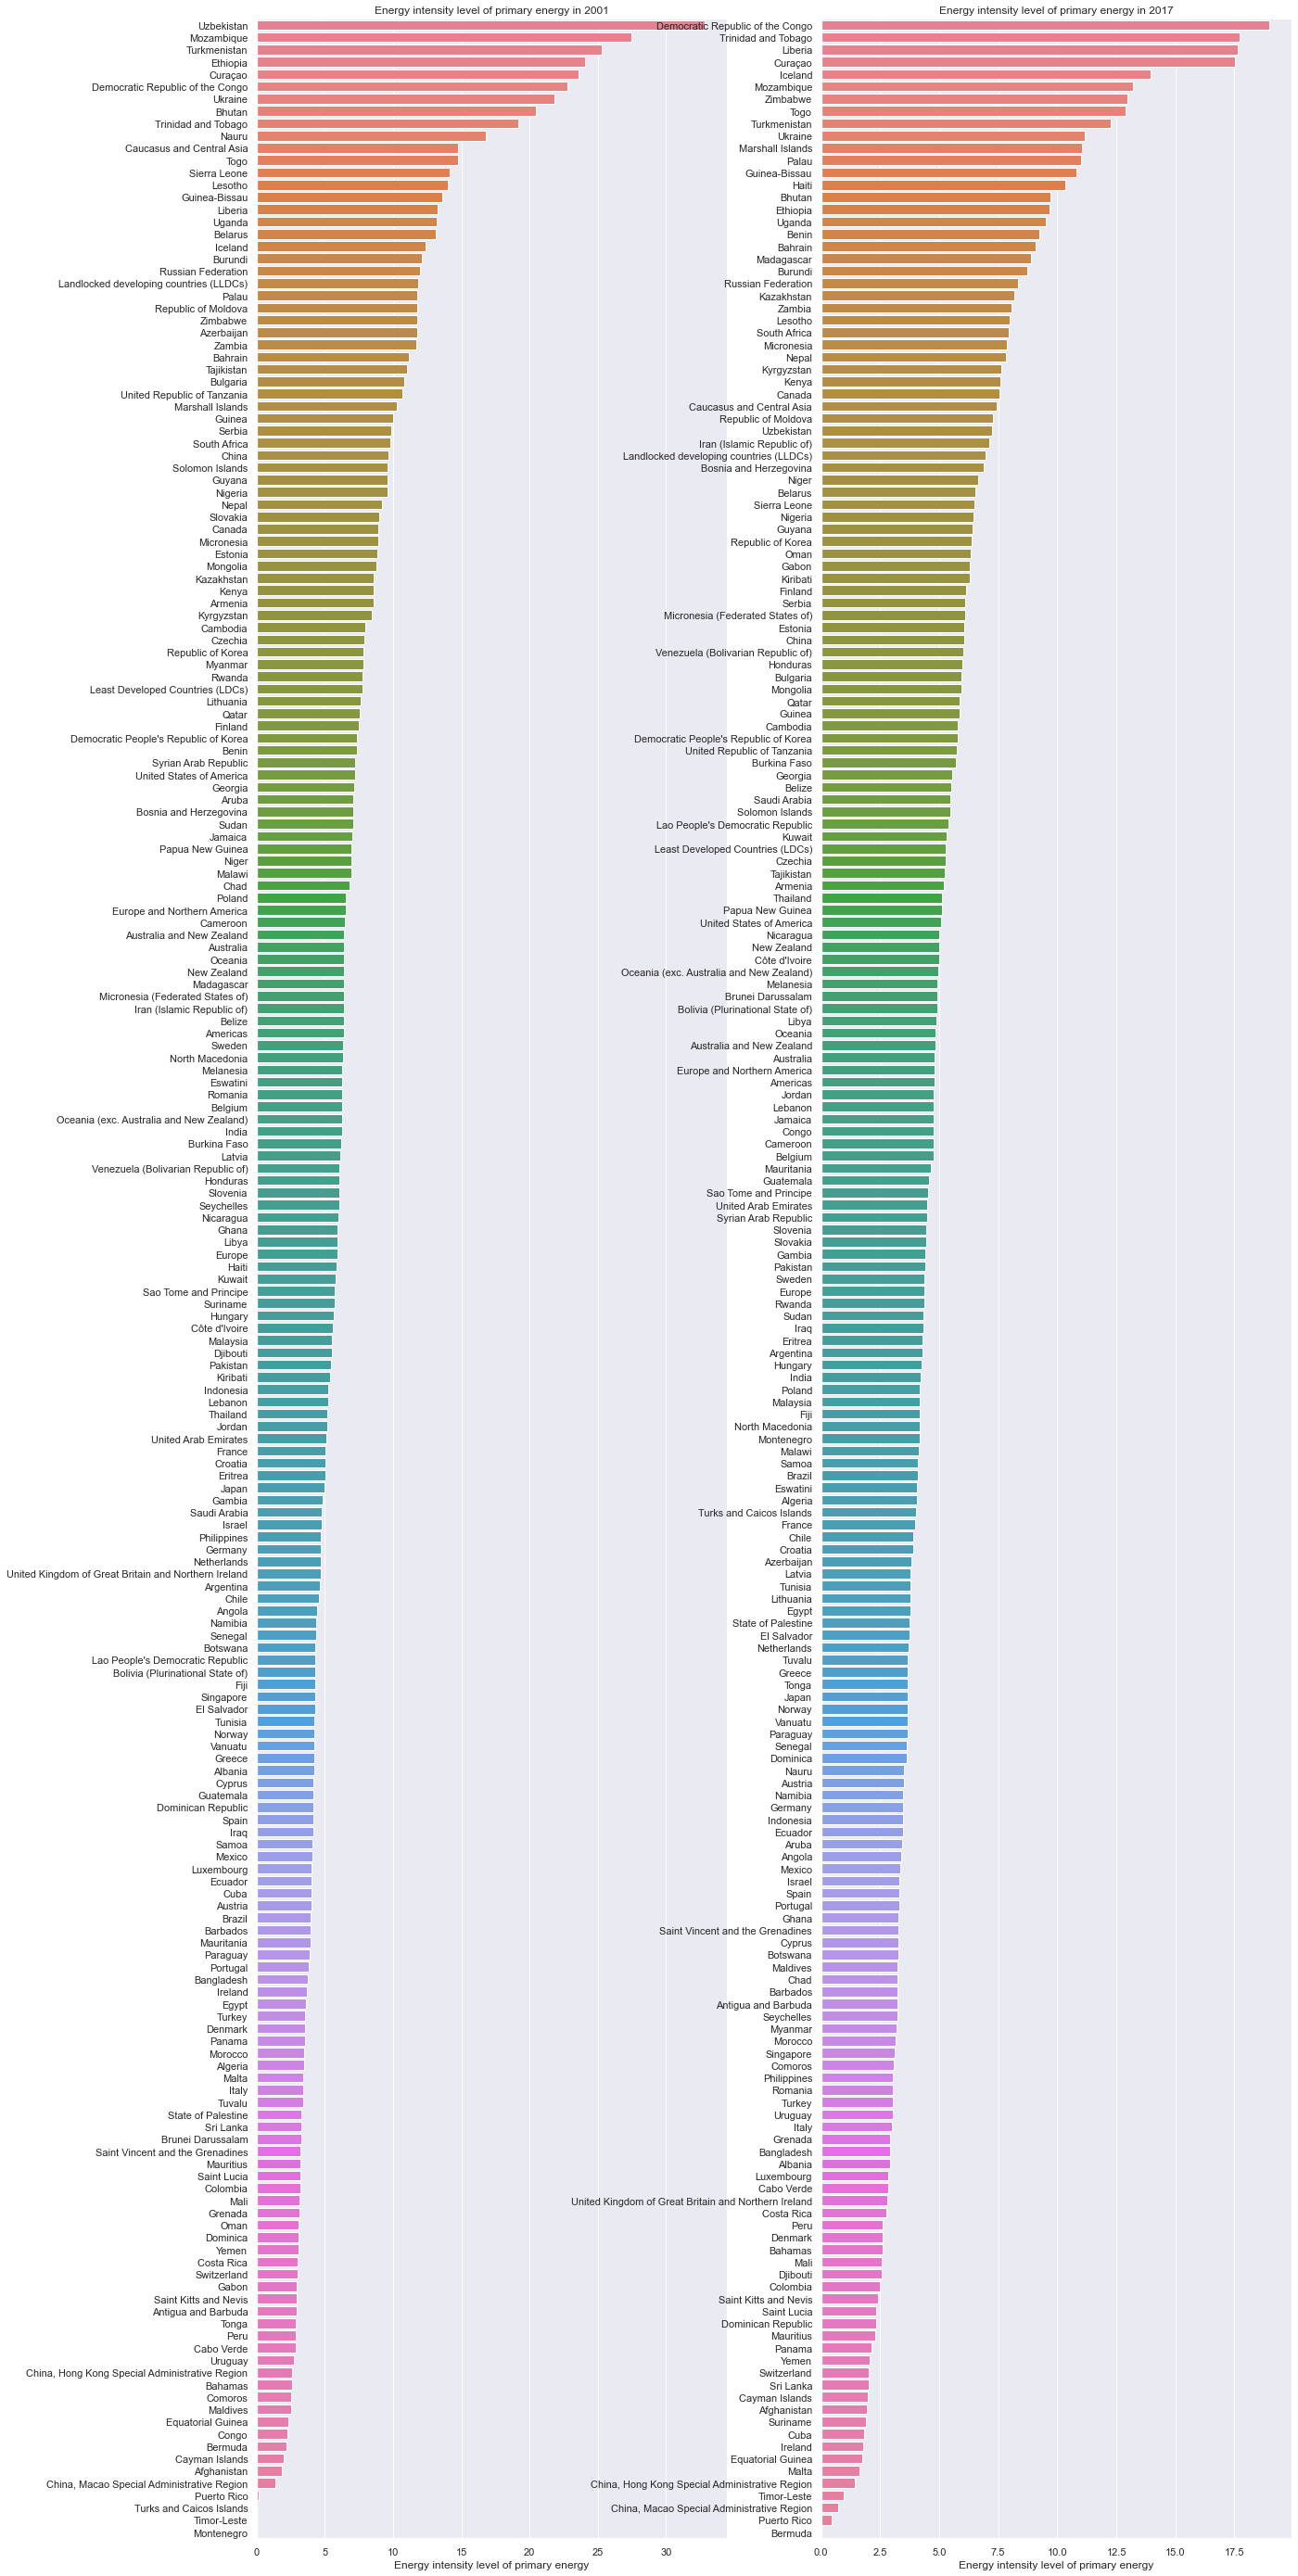

In [29]:
# Tried with Plotly now going with seaborn
twoyearchange1_bar, countries_bar1 = (list(x) for x in zip(*sorted(zip(data['2001'], data['GeoAreaName']), 
                                                             reverse = True)))

twoyearchange2_bar, countries_bar2 = (list(x) for x in zip(*sorted(zip(data['2017'], data['GeoAreaName']), 
                                                             reverse = True)))

# Another direct way of sorting according to values is creating distinct sorted dataframes as in below commented ways and then
# passing their values directly as in below mentioned code to achieve the same effect as by above mentioned method.

# df_country_sorted=df_country.sort(columns='2014-2012 change',ascending=False)
# df_country_sorted.head()


sns.set(font_scale=1) 
fig, axes = plt.subplots(1,2,figsize=(20, 50))
colorspal = sns.color_palette('husl', len(data['2001']))
sns.barplot(twoyearchange1_bar, countries_bar1, palette = colorspal,ax=axes[0])
sns.barplot(twoyearchange2_bar, countries_bar2, palette = colorspal,ax=axes[1])
axes[0].set(xlabel='Energy intensity level of primary energy', title='Energy intensity level of primary energy in 2001')
axes[1].set(xlabel='Energy intensity level of primary energy', title='Energy intensity level of primary energy in 2017')
fig.savefig('output.png')

In [30]:
x_data = ['2001','2017']

y0 = data['2001']
y1 = data['2017']


y_data = [y0,y1]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)']

traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Data',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Percentage (%)',
        autorange=True,
        showgrid=True,
        zeroline=False,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
#        zerolinecolor='rgb(255, 255, 255)',
#        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)